In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Transform: convert to tensor + normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
# Training + Test data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.50MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 159kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.77MB/s]


In [4]:
# DataLoaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [5]:
# Defining Model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784, 16)  # input → hidden
        self.fc2 = nn.Linear(16, 10)   # hidden → output

    def forward(self, x):
        x = x.view(-1, 28*28)   # flatten image
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()

In [6]:
# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
# Training
num_epochs = 5

for epoch in range(num_epochs):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Training started...
Epoch [1/5], Loss: 0.3776
Epoch [2/5], Loss: 0.4764
Epoch [3/5], Loss: 0.2432
Epoch [4/5], Loss: 0.2645
Epoch [5/5], Loss: 0.2011
Training complete ✅


In [8]:
# Accuracy
with torch.no_grad():
    correct, total = 0, 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on Test Set: {accuracy:.2f}%")

Accuracy on Test Set: 92.23%


In [10]:
# Test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

In [11]:
# Move to device if using GPU
images, labels = images.to(model.fc1.weight.device), labels.to(model.fc1.weight.device)

In [12]:
# Predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

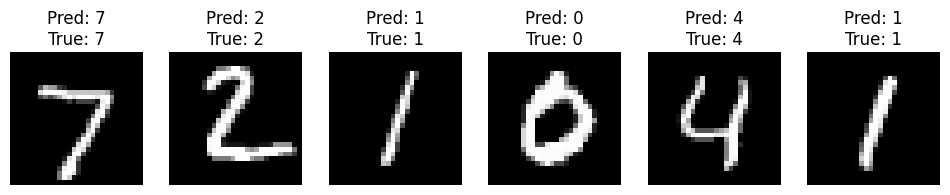

In [13]:
# First 6 images with predictions
fig, axes = plt.subplots(1, 6, figsize=(12, 3))
for i in range(6):
    axes[i].imshow(images[i].cpu().squeeze(), cmap="gray")
    axes[i].set_title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
    axes[i].axis("off")

plt.show()